In [1]:
import torch
import time
from utils.clocks.global_clock import clock, GLOBAL_TIME, GLOBAL_WAVE, GLOBAL_PULSE, GLOBAL_SPIKE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())


PyTorch version: 2.5.1
CUDA available: True
Number of GPUs: 1


In [2]:
class LIFNeuron:
    def __init__(self, v_rest=0.0, v_thresh=1.0, v_reset=0.0, tau=20.0, device=None):
        # Device
        self.device = device

        # Neuron parameters
        self.v_rest = v_rest
        self.v_thresh = v_thresh
        self.v_reset = v_reset
        self.tau = tau

        # Internal state
        self.v = torch.tensor([v_rest], dtype=torch.float32, device=self.device)  # Membrane potential
        self.input_current = torch.zeros(1, dtype=torch.float32, device=self.device)
        self.spike = torch.zeros(1, dtype=torch.uint8, device=self.device)  # 0 or 1

    def receive_input(self, current: torch.Tensor):
        """Accumulate input current from other neurons or stimuli."""
        self.input_current += current.to(self.device)

    def update(self, global_time=None, global_wave=None, global_pulse=None):
        """Update neuron state based on LIF dynamics."""
        # LIF equation: dv = (-(v - v_rest) + I) / tau
        dv = (-(self.v - self.v_rest) + self.input_current) / self.tau
        self.v += dv

        # Check if neuron spikes
        if self.v >= self.v_thresh:
            self.spike[...] = 1
            self.v[...] = self.v_reset  # Reset after spike
        else:
            self.spike[...] = 0

        # Clear input current for next time step
        self.input_current.zero_()

    @property
    def output(self) -> torch.Tensor:
        """Return current spike output (1 if spiked, else 0)."""
        return self.spike


In [5]:
neuron = LIFNeuron(device=device)

timer = clock(freq=2.0, sample_rate=100, amplitude=1.0)
timer.start()
time.sleep(1)

spike_train = []
timestamp = []

while True:
    timestamp.append(GLOBAL_TIME.item())
    spike_train.append(GLOBAL_SPIKE.item())

    if GLOBAL_TIME.item() > 5:
        break
    
    time.sleep(1/100)

timer.stop()

print(spike_train)
# for t in range(25):
#     neuron.receive_input(torch.tensor([10]))
#     neuron.update()
#     print(f"Step {t:02d} | V: {neuron.v.item():.4f} | Spike: {neuron.output.item()}")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

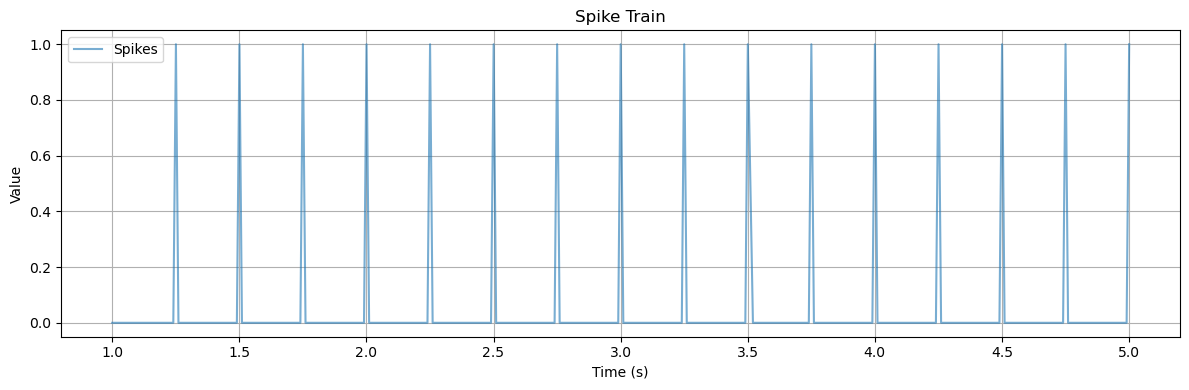

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(timestamp, spike_train, label="Spikes", alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Spike Train")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
timer = clock(freq=2.0, sample_rate=100, amplitude=1.0)
timer.start()
time.sleep(1)

steps = 100
sample_rate = 1/steps

timestamp = []
wave_values = []
pulse_values = []

for i in range(steps):
    timestamp.append(GLOBAL_TIME.item())
    wave_values.append(GLOBAL_WAVE.item())
    pulse_values.append(GLOBAL_PULSE.item())
    time.sleep(sample_rate)

timer.stop()

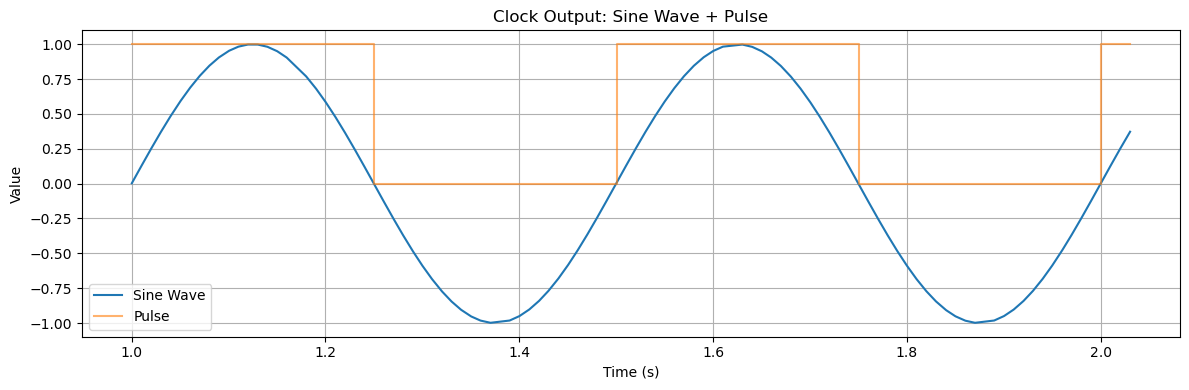

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(timestamp, wave_values, label='Sine Wave')
plt.step(timestamp, pulse_values, label="Pulse", where="post", alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Clock Output: Sine Wave + Pulse")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()